# Transfer Learning using PSI

A Pap smear, also called a Pap test, is a procedure to test for cervical cancer in women. A Pap smear involves collecting cells from your cervix — the lower, narrow end of your uterus that's at the top of your vagina. Detecting cervical cancer early with a Pap smear gives you a greater chance at a cure.

In [1]:
import numpy as np
import pandas as pd
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import time

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [2]:
# !pip install opencv-python

In [3]:
import cv2
import numpy as np
import os

def preprocess_images_in_folders(root_folder, target_size=(224, 224)):
    all_preprocessed_images = []

    # Iterate over all subfolders in the root folder
    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)

        # Check if the path is a directory
        if os.path.isdir(folder_path):
            print(f"Processing images in folder: {folder_name}")

            # Preprocess images in the current folder
            preprocessed_images = preprocess_images_in_folder(folder_path, target_size)

            # Extend the list of all preprocessed images
            all_preprocessed_images.extend(preprocessed_images)

    return all_preprocessed_images

def preprocess_images_in_folder(folder_path, target_size=(224, 224)):
    preprocessed_images = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.bmp')):
            # Construct the full path to the image
            image_path = os.path.join(folder_path, filename)

            # Preprocess the image
            preprocessed_image = preprocess_image(image_path, target_size)

            # Append the preprocessed image to the list
            preprocessed_images.append(preprocessed_image)

    return preprocessed_images

def preprocess_image(image_path, target_size=(224, 224)):
    # Read the image
    image = cv2.imread(image_path)

    # Resize the image
    image = cv2.resize(image, target_size)

    # Convert the image to grayscale (optional, depending on your task)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize pixel values to be between 0 and 1
    image = image.astype(np.float32) / 255.0

    # You can apply additional preprocessing steps here based on your requirements

    return image

# Example usage
root_folder = r"C:\Users\ASUS\Desktop"
all_preprocessed_images = preprocess_images_in_folders(root_folder)


Processing images in folder: client2
Processing images in folder: client3
Processing images in folder: client4
Processing images in folder: DATSAET
Processing images in folder: DATSAETclient1
Processing images in folder: New folder
Processing images in folder: New folder (2)


USE THIS FOR TEST DATA

In [ ]:






#THIS IS FOR TEST DATA CUT AND PASTE





import shutil
import os

# Define the source and destination folder paths
src_folder = '/path/to/source_folder/'
dst_folder = '/path/to/destination_folder/'

# Move all the contents of the source folder to the destination folder
for filename in os.listdir(src_folder):
    shutil.move(os.path.join(src_folder, filename), dst_folder)

# Print a success message
print(f"All files from {src_folder} have been moved to {dst_folder}.")


In [4]:
import os
import random
import shutil

main_folder_path = r"C:\Users\ASUS\Desktop\DATSAET"
client_paths = [r"C:\Users\ASUS\Desktop\DATSAET\client1", r"C:\Users\ASUS\Desktop\DATSAET\client2", r"C:\Users\ASUS\Desktop\DATSAET\client3", r"C:\Users\ASUS\Desktop\DATSAET\client4"]
desired_distribution = {
    'im_Dyskeratotic': [270, 156, 106, 81],
    'im_Koilocytotic': [98, 109, 121, 190],
    'im_Metaplastic': [124, 139, 89, 241],
    'im_Parabasal': [152, 84, 234, 117],
    'im_Superficial-Intermediate': [173, 131, 204, 113]
}

# Initialize client data dictionaries
client_data = {client: {} for client in client_paths}

# Iterate through the classes
for class_folder in desired_distribution:
    class_path = os.path.join(main_folder_path, class_folder)

    # Check if the item is a directory (subfolder)
    if os.path.isdir(class_path):
        class_images = os.listdir(class_path)
        random.shuffle(class_images)  # Shuffle images randomly

        # Iterate through clients and assign images
        for i, client in enumerate(client_paths):
            start = sum(desired_distribution[class_folder][:i])
            end = sum(desired_distribution[class_folder][:i + 1])

            # Check if the client path exists in the dictionary
            if client in client_data:
                client_data[client].setdefault(class_folder, []).extend(class_images[start:end])

# # Print the resulting distribution for each client
# for client, distribution in client_data.items():
#     print(f"Client: {client}")
#     for class_folder, images in distribution.items():
#         print(f"  {class_folder}: {len(images)} images - {images[:5]}...")

# Copy images to the corresponding client folders
for client, distribution in client_data.items():
    client_folder = os.path.join(client)
    os.makedirs(client_folder, exist_ok=True)

    for class_folder, images in distribution.items():
        class_path = os.path.join(main_folder_path, class_folder)
        dest_path = os.path.join(client_folder, class_folder)
        os.makedirs(dest_path, exist_ok=True)

        for image in images:
            src_path = os.path.join(class_path, image)
            dest_image_path = os.path.join(dest_path, image)
            shutil.copy(src_path, dest_image_path)


In [5]:
from keras.preprocessing.image import ImageDataGenerator
def load_img_data1():
    img_size = (128,128)
    datagen = ImageDataGenerator()
    train_data = datagen.flow_from_directory(
        directory=r"C:\Users\ASUS\Desktop\DATSAET\client1",
        target_size=img_size,
        class_mode="categorical",
        batch_size=32,
    )
    
    return train_data

In [6]:
from keras.preprocessing.image import ImageDataGenerator
def load_img_data2():
    img_size = (128,128)
    datagen = ImageDataGenerator()
    train_data = datagen.flow_from_directory(
        directory=r"C:\Users\ASUS\Desktop\DATSAET\client2",
        target_size=img_size,
        class_mode="categorical",
        batch_size=32,
    )
    
    return train_data

In [7]:
from keras.preprocessing.image import ImageDataGenerator
def load_img_data3():
    img_size = (128,128)
    datagen = ImageDataGenerator()
    train_data = datagen.flow_from_directory(
        directory=r"C:\Users\ASUS\Desktop\DATSAET\client3",
        target_size=img_size,
        class_mode="categorical",
        batch_size=32,
    )
    
    return train_data

In [8]:
from keras.preprocessing.image import ImageDataGenerator
def load_img_data4():
    img_size = (128,128)
    datagen = ImageDataGenerator()
    train_data = datagen.flow_from_directory(
        directory=r"C:\Users\ASUS\Desktop\DATSAET\client4",
        target_size=img_size,
        class_mode="categorical",
        batch_size=32,
    )
    
    return train_data

In [9]:
train1=load_img_data1()
train2=load_img_data2()
train3=load_img_data3()
train4=load_img_data4()

Found 1936 images belonging to 5 classes.
Found 1586 images belonging to 5 classes.
Found 1827 images belonging to 5 classes.
Found 1758 images belonging to 5 classes.


In [10]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# def one_hot_encode_labels(labels):
#     # Your one_hot_encode_labels function here
def on_hot_encode_labels(lables):
    aug_list=[]
    for i in range(len(lables)):
        if lables[i]==0:
            aug_list.append([0,1,0,0,0])
        elif lables[i]==1:
            aug_list.append([1,0,0,0,0])
        elif lables[i]==2:
            aug_list.append([0,0,1,0,0])
        elif lables[i]==3:
            aug_list.append([0,0,0,1,0])
        elif lables[i]==4:
            aug_list.append([0,0,0,0,1])
    return aug_list

In [11]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

def load_img_data(test_data):
    img_size = (128, 128)

    # Load images and labels into numpy arrays
    images = []
    labels = []
    for batch in test_data:
        images.extend(batch[0])  # Load images from the batch
        labels.extend(np.argmax(batch[1], axis=1))  # Convert one-hot labels to integers
        if len(labels) >= len(test_data.filenames):
            break

    # Convert labels to one-hot encoded format
    one_hot_labels = on_hot_encode_labels(labels)

    return np.array(images), np.array(one_hot_labels)


In [12]:
train1, label1 = load_img_data(train1)
train2, label2 = load_img_data(train2)
train3, label3 = load_img_data(train3)
train4, label4 = load_img_data(train4)

In [13]:
train1=train1/255
train2=train2/255
train3=train3/255
train4=train4/255

THIS IS FOR DISTRIBUTION OF DDATA INTO TEST FOLDER

In [16]:
import os
import random
import shutil
main_folder_path = r"C:\Users\ASUS\Desktop\DATSAET"
# main_folder_path = "C:/Users/91898/Downloads/New folder"
client_paths = [r"C:\Users\ASUS\Desktop\DATSAET\test"]
desired_distribution = {
    'im_Dyskeratotic': [200],
    'im_Koilocytotic': [200],
    'im_Metaplastic': [200],
    'im_Parabasal': [200],
    'im_Superficial-Intermediate': [200]
}

# Initialize client data dictionaries
client_data = {client: {} for client in client_paths}

# Iterate through the classes
for class_folder in desired_distribution:
    class_path = os.path.join(main_folder_path, class_folder)

    # Check if the item is a directory (subfolder)
    if os.path.isdir(class_path):
        class_images = os.listdir(class_path)
        random.shuffle(class_images)  # Shuffle images randomly

        # Iterate through clients and assign images
        for i, client in enumerate(client_paths):
            start = sum(desired_distribution[class_folder][:i])
            end = sum(desired_distribution[class_folder][:i + 1])

            # Check if the client path exists in the dictionary
            if client in client_data:
                client_data[client].setdefault(class_folder, []).extend(class_images[start:end])

# # Print the resulting distribution for each client
# for client, distribution in client_data.items():
#     print(f"Client: {client}")
#     for class_folder, images in distribution.items():
#         print(f"  {class_folder}: {len(images)} images - {images[:5]}...")

# Copy images to the corresponding client folders
for client, distribution in client_data.items():
    client_folder = os.path.join(client)
    os.makedirs(client_folder, exist_ok=True)

    for class_folder, images in distribution.items():
        class_path = os.path.join(main_folder_path, class_folder)
        dest_path = os.path.join(client_folder, class_folder)
        os.makedirs(dest_path, exist_ok=True)

        for image in images:
            src_path = os.path.join(class_path, image)
            dest_image_path = os.path.join(dest_path, image)
            shutil.copy(src_path, dest_image_path)


In [17]:
from keras.preprocessing.image import ImageDataGenerator
def load_img_data():
    img_size = (128,128)
    datagen = ImageDataGenerator()
    test_data = datagen.flow_from_directory(
        directory=r"C:\Users\ASUS\Desktop\DATSAET\test",
        target_size=img_size,
        class_mode="categorical",
        batch_size=32,
    )
    
    return test_data

In [18]:
test=load_img_data()

Found 1000 images belonging to 5 classes.


In [19]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# def one_hot_encode_labels(labels):
#     # Your one_hot_encode_labels function here
def on_hot_encode_labels(lables):
    aug_list=[]
    for i in range(len(lables)):
        if lables[i]==0:
            aug_list.append([0,1,0,0,0])
        elif lables[i]==1:
            aug_list.append([1,0,0,0,0])
        elif lables[i]==2:
            aug_list.append([0,0,1,0,0])
        elif lables[i]==3:
            aug_list.append([0,0,0,1,0])
        elif lables[i]==4:
            aug_list.append([0,0,0,0,1])
    return aug_list

In [20]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

def load_img_data(test_data):
    img_size = (128, 128)

    # Load images and labels into numpy arrays
    images = []
    labels = []
    for batch in test_data:
        images.extend(batch[0])  # Load images from the batch
        labels.extend(np.argmax(batch[1], axis=1))  # Convert one-hot labels to integers
        if len(labels) >= len(test_data.filenames):
            break

    # Convert labels to one-hot encoded format
    one_hot_labels = on_hot_encode_labels(labels)

    return np.array(images), np.array(one_hot_labels)


In [21]:
test, one_hot_labels = load_img_data(test)

In [22]:
test=test/255

In [25]:
!pip install tensorflow_hub

  Obtaining dependency information for tensorflow_hub from https://files.pythonhosted.org/packages/e5/50/00dba77925bf2a0a1e45d7bcf8a69a1d2534fb4bb277d9010bd148d2235e/tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tf-keras>=2.14.1 from https://files.pythonhosted.org/packages/19/26/ca8a6cca61f2a44f1e7ee71ebdb9c8dfbc4371f418db811cdca4641f6daa/tf_keras-2.15.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   -----------------

In [28]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models, optimizers
# import tensorflow_datasets as tfds

class SimpleMLP:
    @staticmethod
    def build():
        # Load the ResNet101V2 model as the base model
        base_model = tf.keras.applications.ResNet101V2(
            include_top=False, weights='imagenet', input_shape=(128, 128, 3)
        )
        
        # Freeze the base model's layers
        base_model.trainable = False

        # Create the transfer learning model by adding custom classification layers on top of the base model
        model = tf.keras.models.Sequential([
            base_model,
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dense(512, activation='relu'),
            # Optionally, you can add another dense layer
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(5, activation='softmax')  # Adjust the number of output classes accordingly
        ])

        # Compile the model
        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

# Create an instance of the SimpleMLP model
simple_mlp_model = SimpleMLP.build()
global_model=simple_mlp_model

# Display the model summary
simple_mlp_model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 4, 4, 2048)        42626560  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 43741957 (166.86 MB)
Trainable params: 1115397 (4.25 MB)
Non-trainable params: 42626560 (162.61 MB)
_____

In [29]:
def create_clients(data_dict):
    '''
    Return a dictionary with keys as client names and values as data and label lists.
    Args: data_dict: A dictionary where keys are client names, and values are tuples of data and labels.
                    For example, {'client_1': (data_1, labels_1), 'client_2': (data_2, labels_2), ...}
    Returns: A dictionary with keys as client names and values as tuples of data and label lists.
    '''
    return data_dict

import tensorflow as tf


def test_model(test, one_hot_labels,  model, comm_round):
    loss,accuracy=model.evaluate(test, one_hot_labels)
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, accuracy, loss))
    return accuracy, loss


def avg_weights(scaled_weight_list):
    '''Return the average of the listed scaled weights.'''
    num_clients = len(scaled_weight_list)

    if num_clients == 0:
        return None  # Handle the case where the list is empty

    avg_grad = list()

    # Get the sum of gradients across all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0) / num_clients
        avg_grad.append(layer_mean)

    return avg_grad


client_data = {
    'client_1': (train1,label1),
    'client_2': (train2,label2),
    'client_3': (train3,label3),
    'client_4': (train4,label4)
    
}

#create clients
clients_batched = create_clients(client_data)

In [30]:
client_names = list(clients_batched.keys())

In [31]:
train1.shape

(1936, 128, 128, 3)

In [32]:
train2.shape

(1586, 128, 128, 3)

In [33]:
train3.shape

(1827, 128, 128, 3)

In [34]:
train4.shape

(1758, 128, 128, 3)

In [35]:
one_hot_labels

array([[0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [36]:
comms_round = 30  # Number of global epochs
acc3 = []

for comm_round in range(comms_round):

    # Get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()

    # Initial list to collect local model weights after scaling
    local_weight_list = []

    # Randomize client data - using keys
    client_names = list(clients_batched.keys())
    random.shuffle(client_names)
    
    for client in tqdm(client_names, desc='Progress Bar'):
        local_model = SimpleMLP.build()

        local_model.compile(
            loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy']
        )

        # Set local model weight to the weight of the global model
        local_model.set_weights(global_weights)

        # Fit local model with client's data
        local_model.fit(
            np.array(clients_batched[client][0]),
            np.array(clients_batched[client][1]),
            epochs=2,
            batch_size=32,
            verbose= 2
        )

        # Get the scaled model weights and add to the list
        weights = local_model.get_weights()
        local_weight_list.append(weights)

        # Clear the session to free memory after each communication round
        K.clear_session()

    # Calculate the average weights across all clients for each layer
    average_weights = avg_weights(local_weight_list)

    # Update the global model with the average weights
    global_model.set_weights(average_weights)
    
    # Optionally, you can also test the global model at this point using a separate test dataset
    global_acc, global_loss = test_model(test, one_hot_labels, global_model, comm_round)
    acc3.append(global_acc)


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2


50/50 - 20s - loss: 0.6824 - accuracy: 0.7453 - 20s/epoch - 408ms/step
Epoch 2/2
50/50 - 17s - loss: 0.2487 - accuracy: 0.9086 - 17s/epoch - 339ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:40<02:02, 40.80s/it]

Epoch 1/2
55/55 - 24s - loss: 0.7041 - accuracy: 0.7400 - 24s/epoch - 435ms/step
Epoch 2/2
55/55 - 18s - loss: 0.2467 - accuracy: 0.9130 - 18s/epoch - 335ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:27<01:28, 44.06s/it]

Epoch 1/2
58/58 - 25s - loss: 0.5928 - accuracy: 0.7887 - 25s/epoch - 423ms/step
Epoch 2/2
58/58 - 21s - loss: 0.2076 - accuracy: 0.9239 - 21s/epoch - 357ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:16<00:46, 46.26s/it]

Epoch 1/2
61/61 - 25s - loss: 0.6160 - accuracy: 0.7789 - 25s/epoch - 410ms/step
Epoch 2/2
61/61 - 20s - loss: 0.2235 - accuracy: 0.9184 - 20s/epoch - 336ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:05<00:00, 46.30s/it]


32/32 [==============================] - 13s 338ms/step - loss: 0.2229 - accuracy: 0.9240
comm_round: 0 | global_acc: 92.400% | global_loss: 0.22286434471607208


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
61/61 - 24s - loss: 0.2903 - accuracy: 0.9003 - 24s/epoch - 392ms/step
Epoch 2/2
61/61 - 21s - loss: 0.1514 - accuracy: 0.9540 - 21s/epoch - 344ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:48<02:24, 48.31s/it]

Epoch 1/2
50/50 - 22s - loss: 0.3357 - accuracy: 0.8752 - 22s/epoch - 433ms/step
Epoch 2/2
50/50 - 17s - loss: 0.1369 - accuracy: 0.9565 - 17s/epoch - 342ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:30<01:29, 44.80s/it]

Epoch 1/2
58/58 - 24s - loss: 0.2860 - accuracy: 0.8927 - 24s/epoch - 416ms/step
Epoch 2/2
58/58 - 20s - loss: 0.1208 - accuracy: 0.9617 - 20s/epoch - 343ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:18<00:46, 46.16s/it]

Epoch 1/2
55/55 - 23s - loss: 0.3348 - accuracy: 0.8800 - 23s/epoch - 417ms/step
Epoch 2/2
55/55 - 19s - loss: 0.1541 - accuracy: 0.9477 - 19s/epoch - 354ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:04<00:00, 46.13s/it]


32/32 [==============================] - 13s 373ms/step - loss: 0.1137 - accuracy: 0.9580
comm_round: 1 | global_acc: 95.800% | global_loss: 0.11366002261638641


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
58/58 - 26s - loss: 0.1813 - accuracy: 0.9409 - 26s/epoch - 455ms/step
Epoch 2/2
58/58 - 22s - loss: 0.1005 - accuracy: 0.9683 - 22s/epoch - 373ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:51<02:34, 51.60s/it]

Epoch 1/2
61/61 - 28s - loss: 0.1941 - accuracy: 0.9303 - 28s/epoch - 455ms/step
Epoch 2/2
61/61 - 23s - loss: 0.0873 - accuracy: 0.9695 - 23s/epoch - 375ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:45<01:46, 53.20s/it]

Epoch 1/2
50/50 - 23s - loss: 0.2042 - accuracy: 0.9294 - 23s/epoch - 457ms/step
Epoch 2/2
50/50 - 19s - loss: 0.1168 - accuracy: 0.9628 - 19s/epoch - 370ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:30<00:49, 49.47s/it]

Epoch 1/2
55/55 - 25s - loss: 0.2147 - accuracy: 0.9226 - 25s/epoch - 454ms/step
Epoch 2/2
55/55 - 20s - loss: 0.0773 - accuracy: 0.9755 - 20s/epoch - 371ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:20<00:00, 50.07s/it]


32/32 [==============================] - 13s 391ms/step - loss: 0.0742 - accuracy: 0.9740
comm_round: 2 | global_acc: 97.400% | global_loss: 0.07424860447645187


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
50/50 - 23s - loss: 0.1590 - accuracy: 0.9464 - 23s/epoch - 455ms/step
Epoch 2/2
50/50 - 18s - loss: 0.0741 - accuracy: 0.9798 - 18s/epoch - 369ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:45<02:17, 45.68s/it]

Epoch 1/2
58/58 - 26s - loss: 0.1398 - accuracy: 0.9557 - 26s/epoch - 447ms/step
Epoch 2/2
58/58 - 21s - loss: 0.0501 - accuracy: 0.9836 - 21s/epoch - 359ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:36<01:36, 48.47s/it]

Epoch 1/2
55/55 - 25s - loss: 0.1441 - accuracy: 0.9494 - 25s/epoch - 461ms/step
Epoch 2/2
55/55 - 20s - loss: 0.0861 - accuracy: 0.9744 - 20s/epoch - 363ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:25<00:48, 48.77s/it]

Epoch 1/2
61/61 - 26s - loss: 0.1483 - accuracy: 0.9478 - 26s/epoch - 433ms/step
Epoch 2/2
61/61 - 22s - loss: 0.0859 - accuracy: 0.9695 - 22s/epoch - 364ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:17<00:00, 49.38s/it]


32/32 [==============================] - 12s 361ms/step - loss: 0.0405 - accuracy: 0.9900
comm_round: 3 | global_acc: 99.000% | global_loss: 0.04045097902417183


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
61/61 - 27s - loss: 0.1006 - accuracy: 0.9638 - 27s/epoch - 442ms/step
Epoch 2/2
61/61 - 22s - loss: 0.0584 - accuracy: 0.9799 - 22s/epoch - 360ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:52<02:37, 52.59s/it]

Epoch 1/2
55/55 - 24s - loss: 0.1101 - accuracy: 0.9625 - 24s/epoch - 440ms/step
Epoch 2/2
55/55 - 20s - loss: 0.0570 - accuracy: 0.9818 - 20s/epoch - 365ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:40<01:39, 49.83s/it]

Epoch 1/2
50/50 - 23s - loss: 0.1022 - accuracy: 0.9704 - 23s/epoch - 463ms/step
Epoch 2/2
50/50 - 18s - loss: 0.0755 - accuracy: 0.9735 - 18s/epoch - 351ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:25<00:47, 47.80s/it]

Epoch 1/2
58/58 - 25s - loss: 0.0858 - accuracy: 0.9699 - 25s/epoch - 434ms/step
Epoch 2/2
58/58 - 20s - loss: 0.0532 - accuracy: 0.9830 - 20s/epoch - 351ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:14<00:00, 48.74s/it]


32/32 [==============================] - 12s 338ms/step - loss: 0.0310 - accuracy: 0.9890
comm_round: 4 | global_acc: 98.900% | global_loss: 0.030971642583608627


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
61/61 - 26s - loss: 0.0816 - accuracy: 0.9752 - 26s/epoch - 420ms/step
Epoch 2/2
61/61 - 22s - loss: 0.0166 - accuracy: 0.9943 - 22s/epoch - 357ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:51<02:33, 51.00s/it]

Epoch 1/2
58/58 - 28s - loss: 0.0615 - accuracy: 0.9770 - 28s/epoch - 481ms/step
Epoch 2/2
58/58 - 22s - loss: 0.0819 - accuracy: 0.9715 - 22s/epoch - 371ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:44<01:44, 52.30s/it]

Epoch 1/2
55/55 - 25s - loss: 0.0843 - accuracy: 0.9750 - 25s/epoch - 461ms/step
Epoch 2/2
55/55 - 20s - loss: 0.0336 - accuracy: 0.9898 - 20s/epoch - 370ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:33<00:51, 51.02s/it]

Epoch 1/2
50/50 - 24s - loss: 0.1043 - accuracy: 0.9678 - 24s/epoch - 471ms/step
Epoch 2/2
50/50 - 19s - loss: 0.1099 - accuracy: 0.9678 - 19s/epoch - 383ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:20<00:00, 50.05s/it]


32/32 [==============================] - 13s 371ms/step - loss: 0.0179 - accuracy: 0.9950
comm_round: 5 | global_acc: 99.500% | global_loss: 0.017919080331921577


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
50/50 - 23s - loss: 0.0575 - accuracy: 0.9811 - 23s/epoch - 458ms/step
Epoch 2/2
50/50 - 18s - loss: 0.0435 - accuracy: 0.9874 - 18s/epoch - 366ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:44<02:14, 44.71s/it]

Epoch 1/2
58/58 - 27s - loss: 0.0612 - accuracy: 0.9797 - 27s/epoch - 473ms/step
Epoch 2/2
58/58 - 20s - loss: 0.0656 - accuracy: 0.9836 - 20s/epoch - 352ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:36<01:37, 48.85s/it]

Epoch 1/2
61/61 - 25s - loss: 0.0735 - accuracy: 0.9742 - 25s/epoch - 417ms/step
Epoch 2/2
61/61 - 21s - loss: 0.0421 - accuracy: 0.9881 - 21s/epoch - 345ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:26<00:49, 49.42s/it]

Epoch 1/2
55/55 - 24s - loss: 0.0907 - accuracy: 0.9721 - 24s/epoch - 431ms/step
Epoch 2/2
55/55 - 19s - loss: 0.0374 - accuracy: 0.9841 - 19s/epoch - 353ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:13<00:00, 48.32s/it]


32/32 [==============================] - 12s 344ms/step - loss: 0.0120 - accuracy: 0.9960
comm_round: 6 | global_acc: 99.600% | global_loss: 0.012021954171359539


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
50/50 - 22s - loss: 0.0508 - accuracy: 0.9880 - 22s/epoch - 435ms/step
Epoch 2/2
50/50 - 17s - loss: 0.0496 - accuracy: 0.9868 - 17s/epoch - 349ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:42<02:08, 42.75s/it]

Epoch 1/2
58/58 - 25s - loss: 0.0584 - accuracy: 0.9819 - 25s/epoch - 425ms/step
Epoch 2/2
58/58 - 21s - loss: 0.0711 - accuracy: 0.9863 - 21s/epoch - 362ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:33<01:35, 47.74s/it]

Epoch 1/2
55/55 - 24s - loss: 0.0663 - accuracy: 0.9784 - 24s/epoch - 428ms/step
Epoch 2/2
55/55 - 19s - loss: 0.0367 - accuracy: 0.9858 - 19s/epoch - 342ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:21<00:47, 47.73s/it]

Epoch 1/2
61/61 - 25s - loss: 0.0466 - accuracy: 0.9845 - 25s/epoch - 415ms/step
Epoch 2/2
61/61 - 22s - loss: 0.1014 - accuracy: 0.9757 - 22s/epoch - 357ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:12<00:00, 48.09s/it]


32/32 [==============================] - 12s 349ms/step - loss: 0.0167 - accuracy: 0.9940
comm_round: 7 | global_acc: 99.400% | global_loss: 0.016668716445565224


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
50/50 - 22s - loss: 0.0574 - accuracy: 0.9880 - 22s/epoch - 442ms/step
Epoch 2/2
50/50 - 17s - loss: 0.0416 - accuracy: 0.9905 - 17s/epoch - 346ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:43<02:09, 43.05s/it]

Epoch 1/2
61/61 - 27s - loss: 0.0693 - accuracy: 0.9819 - 27s/epoch - 436ms/step
Epoch 2/2
61/61 - 23s - loss: 0.0634 - accuracy: 0.9845 - 23s/epoch - 378ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:36<01:38, 49.06s/it]

Epoch 1/2
58/58 - 26s - loss: 0.0407 - accuracy: 0.9880 - 26s/epoch - 448ms/step
Epoch 2/2
58/58 - 20s - loss: 0.0692 - accuracy: 0.9874 - 20s/epoch - 350ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:26<00:49, 49.55s/it]

Epoch 1/2
55/55 - 24s - loss: 0.0464 - accuracy: 0.9812 - 24s/epoch - 428ms/step
Epoch 2/2
55/55 - 19s - loss: 0.0667 - accuracy: 0.9863 - 19s/epoch - 352ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:14<00:00, 48.70s/it]


32/32 [==============================] - 12s 346ms/step - loss: 0.0130 - accuracy: 0.9960
comm_round: 8 | global_acc: 99.600% | global_loss: 0.012992185540497303


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
61/61 - 25s - loss: 0.0586 - accuracy: 0.9819 - 25s/epoch - 416ms/step
Epoch 2/2
61/61 - 21s - loss: 0.0450 - accuracy: 0.9855 - 21s/epoch - 345ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:50<02:30, 50.02s/it]

Epoch 1/2
58/58 - 24s - loss: 0.0525 - accuracy: 0.9841 - 24s/epoch - 416ms/step
Epoch 2/2
58/58 - 20s - loss: 0.0883 - accuracy: 0.9781 - 20s/epoch - 341ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:37<01:37, 48.50s/it]

Epoch 1/2
55/55 - 23s - loss: 0.0486 - accuracy: 0.9863 - 23s/epoch - 422ms/step
Epoch 2/2
55/55 - 19s - loss: 0.0631 - accuracy: 0.9812 - 19s/epoch - 344ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:23<00:47, 47.23s/it]

Epoch 1/2
50/50 - 21s - loss: 0.0330 - accuracy: 0.9912 - 21s/epoch - 428ms/step
Epoch 2/2
50/50 - 17s - loss: 0.0850 - accuracy: 0.9792 - 17s/epoch - 343ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:06<00:00, 46.65s/it]


32/32 [==============================] - 11s 340ms/step - loss: 0.0090 - accuracy: 0.9960
comm_round: 9 | global_acc: 99.600% | global_loss: 0.008983705192804337


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
50/50 - 22s - loss: 0.0490 - accuracy: 0.9887 - 22s/epoch - 437ms/step
Epoch 2/2
50/50 - 17s - loss: 0.0733 - accuracy: 0.9817 - 17s/epoch - 349ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:42<02:08, 42.80s/it]

Epoch 1/2
58/58 - 25s - loss: 0.0386 - accuracy: 0.9885 - 25s/epoch - 427ms/step
Epoch 2/2
58/58 - 21s - loss: 0.1146 - accuracy: 0.9797 - 21s/epoch - 354ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:33<01:35, 47.58s/it]

Epoch 1/2
61/61 - 25s - loss: 0.0546 - accuracy: 0.9850 - 25s/epoch - 415ms/step
Epoch 2/2
61/61 - 21s - loss: 0.0270 - accuracy: 0.9907 - 21s/epoch - 346ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:23<00:48, 48.68s/it]

Epoch 1/2
55/55 - 24s - loss: 0.0345 - accuracy: 0.9915 - 24s/epoch - 431ms/step
Epoch 2/2
55/55 - 19s - loss: 0.1409 - accuracy: 0.9699 - 19s/epoch - 354ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:10<00:00, 47.63s/it]


32/32 [==============================] - 12s 343ms/step - loss: 0.0130 - accuracy: 0.9970
comm_round: 10 | global_acc: 99.700% | global_loss: 0.01303248293697834


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
58/58 - 25s - loss: 0.0297 - accuracy: 0.9907 - 25s/epoch - 435ms/step
Epoch 2/2
58/58 - 20s - loss: 0.0976 - accuracy: 0.9830 - 20s/epoch - 348ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:49<02:27, 49.03s/it]

Epoch 1/2
50/50 - 22s - loss: 0.0745 - accuracy: 0.9823 - 22s/epoch - 439ms/step
Epoch 2/2
50/50 - 18s - loss: 0.0368 - accuracy: 0.9924 - 18s/epoch - 350ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:32<01:31, 45.52s/it]

Epoch 1/2
61/61 - 26s - loss: 0.0393 - accuracy: 0.9897 - 26s/epoch - 432ms/step
Epoch 2/2
61/61 - 21s - loss: 0.0436 - accuracy: 0.9840 - 21s/epoch - 338ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:23<00:48, 48.40s/it]

Epoch 1/2
55/55 - 24s - loss: 0.0303 - accuracy: 0.9920 - 24s/epoch - 429ms/step
Epoch 2/2
55/55 - 19s - loss: 0.0694 - accuracy: 0.9824 - 19s/epoch - 347ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:10<00:00, 47.55s/it]


32/32 [==============================] - 12s 344ms/step - loss: 0.0088 - accuracy: 0.9990
comm_round: 11 | global_acc: 99.900% | global_loss: 0.008796012960374355


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
55/55 - 24s - loss: 0.0645 - accuracy: 0.9835 - 24s/epoch - 433ms/step
Epoch 2/2
55/55 - 20s - loss: 0.0466 - accuracy: 0.9892 - 20s/epoch - 358ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:49<02:28, 49.42s/it]

Epoch 1/2
58/58 - 24s - loss: 0.0368 - accuracy: 0.9940 - 24s/epoch - 421ms/step
Epoch 2/2
58/58 - 20s - loss: 0.0361 - accuracy: 0.9918 - 20s/epoch - 350ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:37<01:37, 48.81s/it]

Epoch 1/2
50/50 - 22s - loss: 0.0254 - accuracy: 0.9924 - 22s/epoch - 432ms/step
Epoch 2/2
50/50 - 17s - loss: 0.0448 - accuracy: 0.9874 - 17s/epoch - 345ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:20<00:45, 45.88s/it]

Epoch 1/2
61/61 - 26s - loss: 0.0267 - accuracy: 0.9943 - 26s/epoch - 420ms/step
Epoch 2/2
61/61 - 22s - loss: 0.0875 - accuracy: 0.9809 - 22s/epoch - 355ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:10<00:00, 47.75s/it]


32/32 [==============================] - 12s 344ms/step - loss: 0.0074 - accuracy: 0.9980
comm_round: 12 | global_acc: 99.800% | global_loss: 0.007366026286035776


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
55/55 - 23s - loss: 0.0278 - accuracy: 0.9937 - 23s/epoch - 427ms/step
Epoch 2/2
55/55 - 19s - loss: 0.0604 - accuracy: 0.9829 - 19s/epoch - 349ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:46<02:18, 46.24s/it]

Epoch 1/2
58/58 - 24s - loss: 0.0226 - accuracy: 0.9940 - 24s/epoch - 418ms/step
Epoch 2/2
58/58 - 20s - loss: 0.0891 - accuracy: 0.9819 - 20s/epoch - 343ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:34<01:34, 47.14s/it]

Epoch 1/2
50/50 - 22s - loss: 0.0239 - accuracy: 0.9937 - 22s/epoch - 442ms/step
Epoch 2/2
50/50 - 16s - loss: 0.0993 - accuracy: 0.9830 - 16s/epoch - 324ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:15<00:44, 44.78s/it]

Epoch 1/2
61/61 - 32s - loss: 0.0278 - accuracy: 0.9928 - 32s/epoch - 522ms/step
Epoch 2/2
61/61 - 21s - loss: 0.0459 - accuracy: 0.9917 - 21s/epoch - 352ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:13<00:00, 48.33s/it]


32/32 [==============================] - 12s 354ms/step - loss: 0.0108 - accuracy: 0.9970
comm_round: 13 | global_acc: 99.700% | global_loss: 0.010843231342732906


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
58/58 - 24s - loss: 0.0205 - accuracy: 0.9978 - 24s/epoch - 421ms/step
Epoch 2/2
58/58 - 20s - loss: 0.0888 - accuracy: 0.9852 - 20s/epoch - 350ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:48<02:24, 48.24s/it]

Epoch 1/2
61/61 - 26s - loss: 0.0296 - accuracy: 0.9928 - 26s/epoch - 424ms/step
Epoch 2/2
61/61 - 21s - loss: 0.0588 - accuracy: 0.9886 - 21s/epoch - 352ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:39<01:39, 49.79s/it]

Epoch 1/2
50/50 - 22s - loss: 0.0219 - accuracy: 0.9968 - 22s/epoch - 432ms/step
Epoch 2/2
50/50 - 17s - loss: 0.0469 - accuracy: 0.9893 - 17s/epoch - 348ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:21<00:46, 46.48s/it]

Epoch 1/2
55/55 - 23s - loss: 0.0140 - accuracy: 0.9949 - 23s/epoch - 427ms/step
Epoch 2/2
55/55 - 19s - loss: 0.1248 - accuracy: 0.9750 - 19s/epoch - 349ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:07<00:00, 46.99s/it]


32/32 [==============================] - 11s 338ms/step - loss: 0.0070 - accuracy: 0.9980
comm_round: 14 | global_acc: 99.800% | global_loss: 0.0070277913473546505


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
58/58 - 24s - loss: 0.0150 - accuracy: 0.9956 - 24s/epoch - 418ms/step
Epoch 2/2
58/58 - 22s - loss: 0.0925 - accuracy: 0.9803 - 22s/epoch - 372ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:49<02:28, 49.41s/it]

Epoch 1/2
55/55 - 25s - loss: 0.0183 - accuracy: 0.9966 - 25s/epoch - 455ms/step
Epoch 2/2
55/55 - 21s - loss: 0.0631 - accuracy: 0.9841 - 21s/epoch - 384ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:39<01:39, 49.62s/it]

Epoch 1/2
50/50 - 22s - loss: 0.0259 - accuracy: 0.9937 - 22s/epoch - 439ms/step
Epoch 2/2
50/50 - 18s - loss: 0.0695 - accuracy: 0.9861 - 18s/epoch - 361ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:22<00:46, 46.95s/it]

Epoch 1/2
61/61 - 27s - loss: 0.0309 - accuracy: 0.9933 - 27s/epoch - 447ms/step
Epoch 2/2
61/61 - 23s - loss: 0.0400 - accuracy: 0.9902 - 23s/epoch - 372ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:16<00:00, 49.24s/it]


32/32 [==============================] - 12s 343ms/step - loss: 0.0213 - accuracy: 0.9970
comm_round: 15 | global_acc: 99.700% | global_loss: 0.021252546459436417


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
58/58 - 25s - loss: 0.0313 - accuracy: 0.9945 - 25s/epoch - 440ms/step
Epoch 2/2
58/58 - 20s - loss: 0.0755 - accuracy: 0.9819 - 20s/epoch - 349ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:53<02:39, 53.27s/it]

Epoch 1/2
55/55 - 24s - loss: 0.0105 - accuracy: 0.9966 - 24s/epoch - 433ms/step
Epoch 2/2
55/55 - 19s - loss: 0.0718 - accuracy: 0.9841 - 19s/epoch - 354ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:40<01:38, 49.49s/it]

Epoch 1/2
61/61 - 26s - loss: 0.0192 - accuracy: 0.9959 - 26s/epoch - 422ms/step
Epoch 2/2
61/61 - 21s - loss: 0.1023 - accuracy: 0.9845 - 21s/epoch - 348ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:30<00:50, 50.00s/it]

Epoch 1/2
50/50 - 22s - loss: 0.0290 - accuracy: 0.9956 - 22s/epoch - 432ms/step
Epoch 2/2
50/50 - 17s - loss: 0.0146 - accuracy: 0.9962 - 17s/epoch - 346ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:13<00:00, 48.29s/it]


32/32 [==============================] - 11s 340ms/step - loss: 0.0092 - accuracy: 0.9980
comm_round: 16 | global_acc: 99.800% | global_loss: 0.009221409447491169


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
55/55 - 24s - loss: 0.0172 - accuracy: 0.9954 - 24s/epoch - 440ms/step
Epoch 2/2
55/55 - 20s - loss: 0.0663 - accuracy: 0.9869 - 20s/epoch - 362ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:47<02:22, 47.67s/it]

Epoch 1/2
50/50 - 22s - loss: 0.0225 - accuracy: 0.9924 - 22s/epoch - 441ms/step
Epoch 2/2
50/50 - 18s - loss: 0.0637 - accuracy: 0.9912 - 18s/epoch - 355ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:31<01:30, 45.18s/it]

Epoch 1/2
61/61 - 26s - loss: 0.0416 - accuracy: 0.9928 - 26s/epoch - 421ms/step
Epoch 2/2
61/61 - 22s - loss: 0.0389 - accuracy: 0.9886 - 22s/epoch - 353ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:22<00:47, 47.84s/it]

Epoch 1/2
58/58 - 25s - loss: 0.0073 - accuracy: 0.9984 - 25s/epoch - 426ms/step
Epoch 2/2
58/58 - 20s - loss: 0.0940 - accuracy: 0.9825 - 20s/epoch - 351ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:11<00:00, 47.76s/it]


32/32 [==============================] - 12s 353ms/step - loss: 0.0027 - accuracy: 0.9980
comm_round: 17 | global_acc: 99.800% | global_loss: 0.0026534192729741335


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
58/58 - 25s - loss: 0.0021 - accuracy: 0.9995 - 25s/epoch - 426ms/step
Epoch 2/2
58/58 - 20s - loss: 0.0852 - accuracy: 0.9896 - 20s/epoch - 350ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:48<02:25, 48.65s/it]

Epoch 1/2
55/55 - 31s - loss: 0.0190 - accuracy: 0.9943 - 31s/epoch - 566ms/step
Epoch 2/2
55/55 - 20s - loss: 0.0346 - accuracy: 0.9932 - 20s/epoch - 363ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:43<01:44, 52.21s/it]

Epoch 1/2
50/50 - 22s - loss: 0.0054 - accuracy: 0.9987 - 22s/epoch - 443ms/step
Epoch 2/2
50/50 - 18s - loss: 0.0501 - accuracy: 0.9905 - 18s/epoch - 362ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:27<00:48, 48.37s/it]

Epoch 1/2
61/61 - 27s - loss: 0.0075 - accuracy: 0.9979 - 27s/epoch - 448ms/step
Epoch 2/2
61/61 - 22s - loss: 0.0793 - accuracy: 0.9866 - 22s/epoch - 361ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:20<00:00, 50.04s/it]


32/32 [==============================] - 12s 354ms/step - loss: 0.0074 - accuracy: 0.9980
comm_round: 18 | global_acc: 99.800% | global_loss: 0.007372576743364334


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
50/50 - 22s - loss: 0.0194 - accuracy: 0.9956 - 22s/epoch - 443ms/step
Epoch 2/2
50/50 - 18s - loss: 0.0692 - accuracy: 0.9880 - 18s/epoch - 355ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:43<02:10, 43.44s/it]

Epoch 1/2
58/58 - 25s - loss: 0.0112 - accuracy: 0.9978 - 25s/epoch - 424ms/step
Epoch 2/2
58/58 - 20s - loss: 0.0733 - accuracy: 0.9858 - 20s/epoch - 351ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:31<01:32, 46.43s/it]

Epoch 1/2
55/55 - 23s - loss: 0.0092 - accuracy: 0.9983 - 23s/epoch - 425ms/step
Epoch 2/2
55/55 - 19s - loss: 0.1538 - accuracy: 0.9755 - 19s/epoch - 350ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:18<00:46, 46.34s/it]

Epoch 1/2
61/61 - 25s - loss: 0.0221 - accuracy: 0.9954 - 25s/epoch - 416ms/step
Epoch 2/2
61/61 - 21s - loss: 0.0315 - accuracy: 0.9943 - 21s/epoch - 347ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:08<00:00, 47.11s/it]


32/32 [==============================] - 12s 369ms/step - loss: 0.0069 - accuracy: 0.9970
comm_round: 19 | global_acc: 99.700% | global_loss: 0.006862378679215908


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
58/58 - 25s - loss: 0.0015 - accuracy: 0.9995 - 25s/epoch - 426ms/step
Epoch 2/2
58/58 - 22s - loss: 0.0928 - accuracy: 0.9891 - 22s/epoch - 378ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:50<02:30, 50.28s/it]

Epoch 1/2
61/61 - 27s - loss: 0.0323 - accuracy: 0.9933 - 27s/epoch - 438ms/step
Epoch 2/2
61/61 - 22s - loss: 0.0037 - accuracy: 0.9995 - 22s/epoch - 367ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:43<01:43, 51.88s/it]

Epoch 1/2
55/55 - 24s - loss: 0.0094 - accuracy: 0.9977 - 24s/epoch - 445ms/step
Epoch 2/2
55/55 - 19s - loss: 0.0472 - accuracy: 0.9858 - 19s/epoch - 352ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:31<00:49, 50.00s/it]

Epoch 1/2
50/50 - 22s - loss: 0.0126 - accuracy: 0.9987 - 22s/epoch - 436ms/step
Epoch 2/2
50/50 - 17s - loss: 0.0961 - accuracy: 0.9849 - 17s/epoch - 348ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:13<00:00, 48.50s/it]


32/32 [==============================] - 12s 342ms/step - loss: 0.0086 - accuracy: 0.9980
comm_round: 20 | global_acc: 99.800% | global_loss: 0.008607219904661179


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
58/58 - 37s - loss: 0.0069 - accuracy: 0.9984 - 37s/epoch - 633ms/step
Epoch 2/2
58/58 - 21s - loss: 0.0370 - accuracy: 0.9923 - 21s/epoch - 355ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [01:00<03:02, 60.96s/it]

Epoch 1/2
61/61 - 27s - loss: 0.0052 - accuracy: 0.9985 - 27s/epoch - 442ms/step
Epoch 2/2
61/61 - 21s - loss: 0.1087 - accuracy: 0.9840 - 21s/epoch - 337ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:52<01:50, 55.21s/it]

Epoch 1/2
55/55 - 22s - loss: 0.0097 - accuracy: 0.9977 - 22s/epoch - 393ms/step
Epoch 2/2
55/55 - 17s - loss: 0.0572 - accuracy: 0.9920 - 17s/epoch - 314ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:34<00:49, 49.32s/it]

Epoch 1/2
50/50 - 20s - loss: 0.0123 - accuracy: 0.9968 - 20s/epoch - 393ms/step
Epoch 2/2
50/50 - 15s - loss: 0.1336 - accuracy: 0.9855 - 15s/epoch - 307ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:12<00:00, 48.23s/it]


32/32 [==============================] - 10s 298ms/step - loss: 0.0110 - accuracy: 0.9990
comm_round: 21 | global_acc: 99.900% | global_loss: 0.011043651960790157


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
61/61 - 23s - loss: 0.0255 - accuracy: 0.9969 - 23s/epoch - 373ms/step
Epoch 2/2
61/61 - 19s - loss: 0.1373 - accuracy: 0.9840 - 19s/epoch - 309ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:44<02:14, 44.92s/it]

Epoch 1/2
55/55 - 21s - loss: 0.0054 - accuracy: 0.9977 - 21s/epoch - 381ms/step
Epoch 2/2
55/55 - 17s - loss: 0.0348 - accuracy: 0.9960 - 17s/epoch - 307ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:26<01:25, 42.74s/it]

Epoch 1/2
50/50 - 20s - loss: 0.0042 - accuracy: 0.9987 - 20s/epoch - 405ms/step
Epoch 2/2
50/50 - 16s - loss: 0.0698 - accuracy: 0.9905 - 16s/epoch - 319ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:05<00:41, 41.35s/it]

Epoch 1/2
58/58 - 22s - loss: 8.2103e-06 - accuracy: 1.0000 - 22s/epoch - 375ms/step
Epoch 2/2
58/58 - 18s - loss: 0.0664 - accuracy: 0.9896 - 18s/epoch - 314ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [02:49<00:00, 42.41s/it]


32/32 [==============================] - 10s 300ms/step - loss: 0.0125 - accuracy: 0.9980
comm_round: 22 | global_acc: 99.800% | global_loss: 0.012476446107029915


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
61/61 - 23s - loss: 1.0031e-05 - accuracy: 1.0000 - 23s/epoch - 376ms/step
Epoch 2/2
61/61 - 21s - loss: 0.0550 - accuracy: 0.9912 - 21s/epoch - 351ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:47<02:23, 47.77s/it]

Epoch 1/2
50/50 - 20s - loss: 2.7824e-06 - accuracy: 1.0000 - 20s/epoch - 404ms/step
Epoch 2/2
50/50 - 16s - loss: 0.0874 - accuracy: 0.9905 - 16s/epoch - 327ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:27<01:26, 43.23s/it]

Epoch 1/2
58/58 - 23s - loss: 0.0041 - accuracy: 0.9984 - 23s/epoch - 399ms/step
Epoch 2/2
58/58 - 19s - loss: 0.0707 - accuracy: 0.9907 - 19s/epoch - 324ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:13<00:44, 44.29s/it]

Epoch 1/2
55/55 - 22s - loss: 3.4875e-04 - accuracy: 1.0000 - 22s/epoch - 409ms/step
Epoch 2/2
55/55 - 18s - loss: 0.0427 - accuracy: 0.9909 - 18s/epoch - 322ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [02:57<00:00, 44.33s/it]


32/32 [==============================] - 10s 310ms/step - loss: 0.0122 - accuracy: 0.9980
comm_round: 23 | global_acc: 99.800% | global_loss: 0.012210591696202755


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
61/61 - 23s - loss: 0.0136 - accuracy: 0.9974 - 23s/epoch - 384ms/step
Epoch 2/2
61/61 - 19s - loss: 0.0300 - accuracy: 0.9943 - 19s/epoch - 318ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:46<02:18, 46.28s/it]

Epoch 1/2
58/58 - 22s - loss: 0.0326 - accuracy: 0.9973 - 22s/epoch - 387ms/step
Epoch 2/2
58/58 - 19s - loss: 0.0254 - accuracy: 0.9956 - 19s/epoch - 330ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:42<01:44, 52.24s/it]

Epoch 1/2
55/55 - 21s - loss: 0.0015 - accuracy: 0.9994 - 21s/epoch - 386ms/step
Epoch 2/2
55/55 - 17s - loss: 0.1137 - accuracy: 0.9841 - 17s/epoch - 315ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:24<00:47, 47.52s/it]

Epoch 1/2
50/50 - 20s - loss: 0.0110 - accuracy: 0.9968 - 20s/epoch - 391ms/step
Epoch 2/2
50/50 - 16s - loss: 0.0443 - accuracy: 0.9905 - 16s/epoch - 317ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:03<00:00, 45.84s/it]


32/32 [==============================] - 10s 307ms/step - loss: 0.0049 - accuracy: 0.9980
comm_round: 24 | global_acc: 99.800% | global_loss: 0.0048901294358074665


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
58/58 - 23s - loss: 0.0024 - accuracy: 0.9989 - 23s/epoch - 389ms/step
Epoch 2/2
58/58 - 19s - loss: 0.0859 - accuracy: 0.9912 - 19s/epoch - 322ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:44<02:14, 44.79s/it]

Epoch 1/2
50/50 - 19s - loss: 0.0037 - accuracy: 0.9987 - 19s/epoch - 385ms/step
Epoch 2/2
50/50 - 15s - loss: 0.0694 - accuracy: 0.9893 - 15s/epoch - 307ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:22<01:21, 40.76s/it]

Epoch 1/2
61/61 - 23s - loss: 0.0085 - accuracy: 0.9995 - 23s/epoch - 370ms/step
Epoch 2/2
61/61 - 19s - loss: 0.1296 - accuracy: 0.9819 - 19s/epoch - 312ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:07<00:42, 42.75s/it]

Epoch 1/2
55/55 - 21s - loss: 0.0075 - accuracy: 0.9994 - 21s/epoch - 378ms/step
Epoch 2/2
55/55 - 17s - loss: 0.0923 - accuracy: 0.9863 - 17s/epoch - 306ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [02:48<00:00, 42.25s/it]


32/32 [==============================] - 11s 334ms/step - loss: 0.0063 - accuracy: 0.9980
comm_round: 25 | global_acc: 99.800% | global_loss: 0.006264530587941408


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
55/55 - 23s - loss: 6.4391e-05 - accuracy: 1.0000 - 23s/epoch - 410ms/step
Epoch 2/2
55/55 - 18s - loss: 0.0722 - accuracy: 0.9915 - 18s/epoch - 328ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:44<02:12, 44.21s/it]

Epoch 1/2
50/50 - 20s - loss: 3.4206e-05 - accuracy: 1.0000 - 20s/epoch - 406ms/step
Epoch 2/2
50/50 - 16s - loss: 0.0524 - accuracy: 0.9918 - 16s/epoch - 323ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:24<01:23, 41.72s/it]

Epoch 1/2
58/58 - 25s - loss: 2.2060e-04 - accuracy: 1.0000 - 25s/epoch - 430ms/step
Epoch 2/2
58/58 - 19s - loss: 0.0846 - accuracy: 0.9901 - 19s/epoch - 320ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:11<00:44, 44.26s/it]

Epoch 1/2
61/61 - 24s - loss: 0.0078 - accuracy: 0.9974 - 24s/epoch - 389ms/step
Epoch 2/2
61/61 - 20s - loss: 0.0485 - accuracy: 0.9959 - 20s/epoch - 328ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [02:58<00:00, 44.73s/it]


32/32 [==============================] - 11s 314ms/step - loss: 0.0111 - accuracy: 0.9980
comm_round: 26 | global_acc: 99.800% | global_loss: 0.011076848022639751


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
55/55 - 22s - loss: 9.1999e-07 - accuracy: 1.0000 - 22s/epoch - 397ms/step
Epoch 2/2
55/55 - 18s - loss: 0.0241 - accuracy: 0.9972 - 18s/epoch - 330ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:43<02:10, 43.47s/it]

Epoch 1/2
50/50 - 20s - loss: 0.0017 - accuracy: 0.9994 - 20s/epoch - 404ms/step
Epoch 2/2
50/50 - 16s - loss: 0.0499 - accuracy: 0.9912 - 16s/epoch - 325ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:23<01:22, 41.40s/it]

Epoch 1/2
61/61 - 25s - loss: 0.0032 - accuracy: 0.9990 - 25s/epoch - 404ms/step
Epoch 2/2
61/61 - 20s - loss: 0.1237 - accuracy: 0.9855 - 20s/epoch - 327ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:11<00:44, 44.50s/it]

Epoch 1/2
58/58 - 48s - loss: 0.0017 - accuracy: 0.9995 - 48s/epoch - 823ms/step
Epoch 2/2
58/58 - 19s - loss: 0.0408 - accuracy: 0.9951 - 19s/epoch - 336ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [03:22<00:00, 50.67s/it]


32/32 [==============================] - 11s 327ms/step - loss: 0.0127 - accuracy: 0.9980
comm_round: 27 | global_acc: 99.800% | global_loss: 0.012708156369626522


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
58/58 - 23s - loss: 0.0064 - accuracy: 0.9989 - 23s/epoch - 403ms/step
Epoch 2/2
58/58 - 19s - loss: 0.0831 - accuracy: 0.9896 - 19s/epoch - 327ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:45<02:17, 45.89s/it]

Epoch 1/2
50/50 - 21s - loss: 1.2025e-04 - accuracy: 1.0000 - 21s/epoch - 412ms/step
Epoch 2/2
50/50 - 16s - loss: 0.0906 - accuracy: 0.9868 - 16s/epoch - 329ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:26<01:25, 42.73s/it]

Epoch 1/2
61/61 - 23s - loss: 5.0485e-05 - accuracy: 1.0000 - 23s/epoch - 385ms/step
Epoch 2/2
61/61 - 19s - loss: 0.0961 - accuracy: 0.9881 - 19s/epoch - 319ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:12<00:44, 44.40s/it]

Epoch 1/2
55/55 - 22s - loss: 8.8575e-04 - accuracy: 0.9994 - 22s/epoch - 394ms/step
Epoch 2/2
55/55 - 18s - loss: 0.1573 - accuracy: 0.9863 - 18s/epoch - 327ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [02:55<00:00, 43.97s/it]


32/32 [==============================] - 11s 313ms/step - loss: 0.0084 - accuracy: 0.9990
comm_round: 28 | global_acc: 99.900% | global_loss: 0.008439985103905201


Progress Bar:   0%|                                                                              | 0/4 [00:00<?, ?it/s]

Epoch 1/2
61/61 - 23s - loss: 0.0126 - accuracy: 0.9974 - 23s/epoch - 385ms/step
Epoch 2/2
61/61 - 19s - loss: 0.0486 - accuracy: 0.9902 - 19s/epoch - 316ms/step


Progress Bar:  25%|█████████████████▌                                                    | 1/4 [00:46<02:18, 46.17s/it]

Epoch 1/2
50/50 - 19s - loss: 0.0066 - accuracy: 0.9987 - 19s/epoch - 385ms/step
Epoch 2/2
50/50 - 15s - loss: 0.0621 - accuracy: 0.9943 - 15s/epoch - 303ms/step


Progress Bar:  50%|███████████████████████████████████                                   | 2/4 [01:23<01:22, 41.20s/it]

Epoch 1/2
55/55 - 21s - loss: 9.7846e-08 - accuracy: 1.0000 - 21s/epoch - 373ms/step
Epoch 2/2
55/55 - 17s - loss: 6.3063e-09 - accuracy: 1.0000 - 17s/epoch - 301ms/step


Progress Bar:  75%|████████████████████████████████████████████████████▌                 | 3/4 [02:04<00:40, 40.89s/it]

Epoch 1/2
58/58 - 21s - loss: 8.7562e-07 - accuracy: 1.0000 - 21s/epoch - 370ms/step
Epoch 2/2
58/58 - 17s - loss: 0.0549 - accuracy: 0.9918 - 17s/epoch - 296ms/step


Progress Bar: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [02:46<00:00, 41.64s/it]


32/32 [==============================] - 10s 296ms/step - loss: 0.0073 - accuracy: 0.9990
comm_round: 29 | global_acc: 99.900% | global_loss: 0.007319987285882235


In [37]:
global_model.predict(test)[0]

32/32 [==============================] - 11s 292ms/step


array([3.5461058e-23, 0.0000000e+00, 4.2559708e-29, 0.0000000e+00,
       1.0000000e+00], dtype=float32)

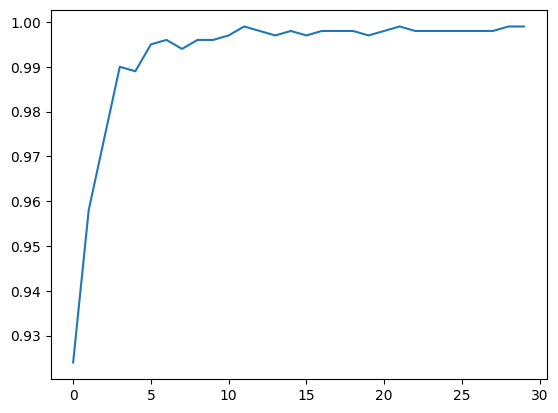

In [38]:
import matplotlib.pyplot as plt
plt.plot(acc3)

In [39]:
acc3=np.array(acc3)

In [40]:
global_model.evaluate(test,one_hot_labels)

32/32 [==============================] - 10s 298ms/step - loss: 0.0073 - accuracy: 0.9990


[0.007319987285882235, 0.9990000128746033]

In [41]:
np.save("acc_fedavg_pap.npy",acc3)

In [42]:
global_model.save("fedavg_pap.h5")

C:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
a = np.load("acc_fedavg_pap.npy")

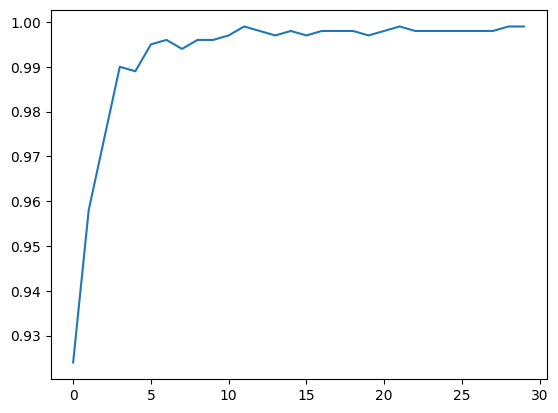

In [44]:
plt.plot(a)